/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 105s 259ms/step - accuracy: 0.2491 - loss: 2.0052 - val_accuracy: 0.4628 - val_loss: 1.4598
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 106s 270ms/step - accuracy: 0.4251 - loss: 1.5896 - val_accuracy: 0.4465 - val_loss: 1.5591
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 101s 259ms/step - accuracy: 0.4759 - loss: 1.4668 - val_accuracy: 0.5647 - val_loss: 1.2119
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 99s 252ms/step - accuracy: 0.5138 - loss: 1.3746 - val_accuracy: 0.5976 - val_loss: 1.1533
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 102s 261ms/step - accuracy: 0.5365 - loss: 1.3128 - val_accuracy: 0.5872 - val_loss: 1.1552
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 99s 253ms/step - accuracy: 0.5579 - loss: 1.2596 - val_accuracy: 0.6113 - val_loss: 1.0973
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 100s 256ms/step - accuracy: 0.5685 - loss: 1.2258 - val_accuracy: 0.6351 - val_loss: 1.0413
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 251ms/step - accuracy: 0.5883 - l

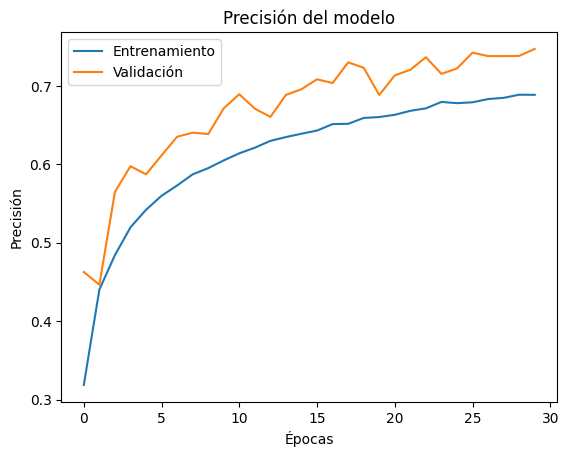

In [ ]:
# 1️⃣ Importar librerías
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStoppingt

# 2️⃣ Cargar dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalización
x_train, x_test = x_train / 255.0, x_test / 255.0

# 3️⃣ Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(x_train)

# 4️⃣ Definir la CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# 5️⃣ Compilar modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_accuracy',  # métrica a observar
    patience=3,              # si no mejora en 3 épocas seguidas, se detiene
    restore_best_weights=True
)

# 6️⃣ Entrenar modelo con data augmentation
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    validation_data=(x_test, y_test),
    epochs=30
)

# 7️⃣ Evaluar modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Precisión en test: {test_acc:.4f}")

# 8️⃣ Visualizar entrenamiento
tplt.plot(history.history['val_accuracy'], label='Validación')
plt.legend()
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 102s 383ms/step - accuracy: 0.2354 - loss: 2.0445 - val_accuracy: 0.4534 - val_loss: 1.4890
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 100s 384ms/step - accuracy: 0.3959 - loss: 1.6486 - val_accuracy: 0.4698 - val_loss: 1.4526
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 108s 413ms/step - accuracy: 0.4444 - loss: 1.5427 - val_accuracy: 0.4996 - val_loss: 1.3663
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 107s 410ms/step - accuracy: 0.4751 - loss: 1.4681 - val_accuracy: 0.5710 - val_loss: 1.2118
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 100s 383ms/step - accuracy: 0.5060 - loss: 1.3918 - val_accuracy: 0.5965 - val_loss: 1.1296
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 102s 390ms/step - accuracy: 0.5234 - loss: 1.3395 - val_accuracy: 0.5534 - val_loss: 1.2549
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 105s 400ms/step - accuracy: 0.5318 - loss: 1.3128 - val_accuracy: 0.6101 - val_loss: 1.1140
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 138s 384ms/step - accuracy: 0.5575 -

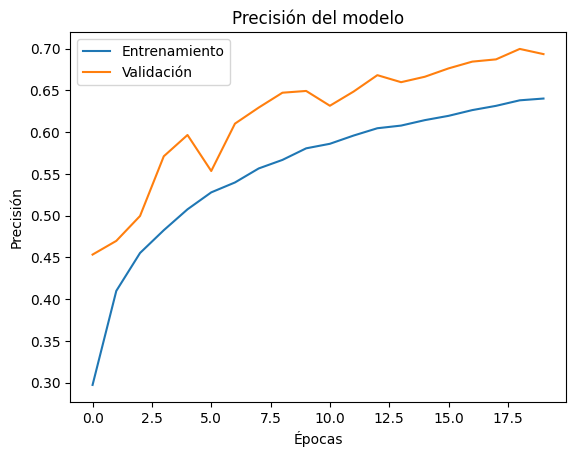

In [ ]:
# 1️⃣ Importar librerías
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# 2️⃣ Cargar dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalización
x_train, x_test = x_train / 255.0, x_test / 255.0

# 3️⃣ Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    zoom_range=0.1
)
datagen.fit(x_train)

# 4️⃣ Definir la CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# 5️⃣ Compilar modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_accuracy',  # métrica a observar
    patience=3,              # si no mejora en 3 épocas seguidas, se detiene
    restore_best_weights=True
)

# 6️⃣ Entrenar modelo con data augmentation
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=192),
    validation_data=(x_test, y_test),
    epochs=20
)

# 7️⃣ Evaluar modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Precisión en test: {test_acc:.4f}")

# 8️⃣ Visualizar entrenamiento
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.legend()
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
261/261 ━━━━━━━━━━━━━━━━━━━━ 111s 414ms/step - accuracy: 0.1933 - loss: 2.1283 - val_accuracy: 0.3809 - val_loss: 1.7272
Epoch 2/25
261/261 ━━━━━━━━━━━━━━━━━━━━ 101s 386ms/step - accuracy: 0.3032 - loss: 1.8825 - val_accuracy: 0.4243 - val_loss: 1.5876
Epoch 3/25
261/261 ━━━━━━━━━━━━━━━━━━━━ 101s 389ms/step - accuracy: 0.3479 - loss: 1.7844 - val_accuracy: 0.4366 - val_loss: 1.5423
Epoch 4/25
261/261 ━━━━━━━━━━━━━━━━━━━━ 99s 380ms/step - accuracy: 0.3767 - loss: 1.7091 - val_accuracy: 0.4288 - val_loss: 1.6053
Epoch 5/25
261/261 ━━━━━━━━━━━━━━━━━━━━ 99s 379ms/step - accuracy: 0.4054 - loss: 1.6568 - val_accuracy: 0.4722 - val_loss: 1.4504
Epoch 6/25
261/261 ━━━━━━━━━━━━━━━━━━━━ 99s 378ms/step - accuracy: 0.4174 - loss: 1.6238 - val_accuracy: 0.4783 - val_loss: 1.4617
Epoch 7/25
261/261 ━━━━━━━━━━━━━━━━━━━━ 100s 381ms/step - accuracy: 0.4292 - loss: 1.5926 - val_accuracy: 0.4897 - val_loss: 1.4042
Epoch 8/25
261/261 ━━━━━━━━━━━━━━━━━━━━ 101s 387ms/step - accuracy: 0.4438 - lo

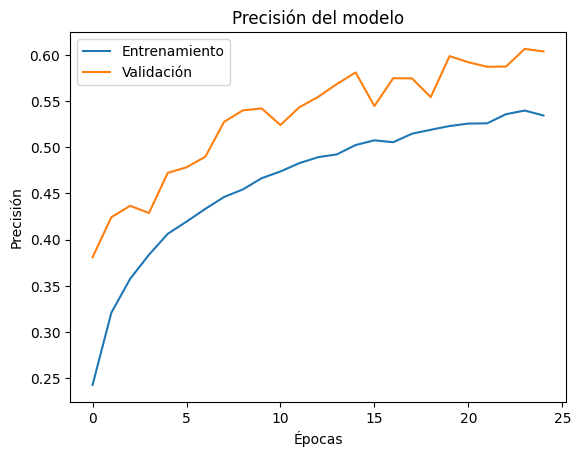

In [ ]:
# 1️⃣ Importar librerías
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# 2️⃣ Cargar dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalización
x_train, x_test = x_train / 255.0, x_test / 255.0

# 3️⃣ Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=70,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.3
)
datagen.fit(x_train)

# 4️⃣ Definir la CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# 5️⃣ Compilar modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_accuracy',  # métrica a observar
    patience=3,              # si no mejora en 3 épocas seguidas, se detiene
    restore_best_weights=True
)

# 6️⃣ Entrenar modelo con data augmentation
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=192),
    validation_data=(x_test, y_test),
    epochs=25
)

# 7️⃣ Evaluar modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Precisión en test: {test_acc:.4f}")

# 8️⃣ Visualizar entrenamiento
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.legend()
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.show()